Intro to DH assignment

as group returned to dataset, made 'clean_DH_data', I then cleaned this up even more retaining just the id's, titles, place of publication, name of publisher and freq of publication as 'DH_data'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("DH_data.xlsx")


df.head()

,Book_ID,Title,Extended Title,Place of Publication,Name of Publisher,Publication Frequency
0,9918687950101480,De gildestem.,NaN,S.l.,ACW,Unknown
1,9918748890101480,Onze lieve vrouw van Kortenbos.,NaN,Sint-Truiden,Onze lieve vrouw van Kortenbos,Other
2,9918753570101480,Nieuws stichting Chili.,NaN,Tongerlo,Norbertijnen Tongerlo,Unknown
3,9918754260101480,Toets,informatieblad van de syndicale werking LBC-NV...,Leuven,Unknown,Unknown
4,9918761110101480,Pausbezoek.,NaN,Unknown,Unknown,Monthly


In [53]:
#delete this:

# Unique values in a column
print(df['Name of Publisher'].unique())

# Value counts in a column
print(df['Name of Publisher'].value_counts())

['ACW' 'Onze lieve vrouw van Kortenbos' 'Norbertijnen Tongerlo' 'Unknown'
 'R.K. initiatief comité' 'Sintal' 'Sprankel' 'Jeunes solidaires Bolivië'
 'NCOV' 'DMOS' 'ACV' 'Vormingscentrum Ter Munk' 'St.-Paulusjeugdkampen'
 'Sociaal en fiscaal middenstandssecretariaat' 'COB-VLO' 'UNDA'
 'Licht en liefde' 'Bisdom Hasselt. Secretariaat bejaardenpastoraal'
 'Verbond van kristelijke mutualiteiten van Limburg. Afdeling Tongeren'
 'Jeugd en gezondheid CM. Verbond Roeselare' 'Sint-Michielsbond' 'CVP'
 'Christen democratische omroep' 'CVP-jongeren' 'KAJ' 'KLJ' 'VKAJ'
 'Trairi-nieuws' 'KAJ-VKAJ' 'Gouw Noordzee prezenteert aan...'
 'Groupe tiers-monde' 'Nieuwsbrief uit Nicaragua'
 "Dossiers sur l'actualité du Guatémala"
 "Bureau international catholique de l'enfance" 'Het thuisfront'
 'Het Marjet Haels thuisfront' 'Comités de solidarité pour le Guatémala'
 'Coordination des comités Guatémala' 'Sociale Hogeschool'
 'Weetjes-en-citaten te nemen of te laten' 'Sint-Jozefscollege'
 'Sint-Victor' 'Format

In [44]:
import pandas as pd

data = pd.read_excel('DH_data.xlsx')
dataSL = data[data['Place of Publication'] != 'S.l.'] #filtering out rows where place of publication is s.l.

data.head()



,Book_ID,Title,Extended Title,Place of Publication,Name of Publisher,Publication Frequency
0,9918687950101480,De gildestem.,NaN,S.l.,ACW,Unknown
1,9918748890101480,Onze lieve vrouw van Kortenbos.,NaN,Sint-Truiden,Onze lieve vrouw van Kortenbos,Other
2,9918753570101480,Nieuws stichting Chili.,NaN,Tongerlo,Norbertijnen Tongerlo,Unknown
3,9918754260101480,Toets,informatieblad van de syndicale werking LBC-NV...,Leuven,Unknown,Unknown
4,9918761110101480,Pausbezoek.,NaN,Unknown,Unknown,Monthly


In [30]:
import pandas as pd

# Read the Excel file into a Pandas DataFrame
#excel_file = 'DH_data.xlsx'  # Replace with your Excel file path
#data = pd.read_excel(excel_file)

# Export the DataFrame to a CSV file
output_csv = 'output2_file.csv'  # Replace with desired output file name/path
dataSL.to_csv(output_csv, index=False, encoding='utf-8')


geomapping journals

In [9]:
%pip install numpy
%pip install python-dateutil
%pip install pytz
%pip install geopy
%pip install pandas

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     -------------------------------------- 40.3/40.3 kB 970.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------  122.9/125.4 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#notes on code: from tutorial:
first cleanup data, romoved 's.l.' locations
added encoding='utf-8'

ran 8 mins then gave AttributeError: 'NoneType' object has no attribute 'latitude'
meaning that it couldn't find the latitude for certain locations, via chatgpt added 'if x else none' clauses to fix this

--> did not work, evt. asked chatgpt, that code did work to extract coordinates

In [35]:
#code from tutorial that did not work:

import geopy
import pandas
from geopy.geocoders import Nominatim
# versions used: geopy 2.2.0, pandas 1.3.3, python 3.7.5

def main():
  io = pandas.read_csv('output2_file.csv', index_col=None, header=0, sep=",", encoding='utf-8')

  def get_latitude(x):
    return x.latitude if x else None

  def get_longitude(x):
    return x.longitude if x else None

  geolocator = Nominatim(user_agent="email@email.com")

  geolocate_column = io['Place of Publication'].apply(geolocator.geocode)
  io['latitude'] = geolocate_column.apply(get_latitude)
  io['longitude'] = geolocate_column.apply(get_longitude)
  io.to_csv('geocoding-output.csv')

if __name__ == '__main__':
  main()

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Geneva&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [23]:
#code via chatgpt that did work to retrieve coordinates:

import pandas as pd

# Load your dataset (replace 'your_data.csv' with your actual file)
data = pd.read_csv('output2_file.csv')

# Display the structure and sample data to understand its contents
print(data.head())

from geopy.geocoders import Nominatim

# Initialize the geolocator (replace 'email@email.com' with your user_agent)
geolocator = Nominatim(user_agent='anna@email.com')

# Geocode the 'Place of Publication' column to get coordinates
data['Coordinates'] = data['Place of Publication'].apply(lambda x: geolocator.geocode(x) if x else None)

# Extract latitude and longitude from 'Coordinates' column
data['Latitude'] = data['Coordinates'].apply(lambda x: x.latitude if x else None)
data['Longitude'] = data['Coordinates'].apply(lambda x: x.longitude if x else None)

# Display the modified dataset to check the added latitude and longitude columns
print(data.head())


            Book_ID                            Title  \
0  9918748890101480  Onze lieve vrouw van Kortenbos.   
1  9918753570101480          Nieuws stichting Chili.   
2  9918754260101480                            Toets   
3  9918761110101480                      Pausbezoek.   
4  9918775740101480                           Parels   

                                     Extended Title  Place of Publication  \
0                                                NaN         Sint-Truiden   
1                                                NaN             Tongerlo   
2  informatieblad van de syndicale werking LBC-NV...               Leuven   
3                                                NaN              Unknown   
4  parels van Rooms katholieke journalistiek uit ...            Amsterdam   

                Name of Publisher Publication Frequency  
0  Onze lieve vrouw van Kortenbos                 Other  
1           Norbertijnen Tongerlo               Unknown  
2                         

In [29]:
data.to_csv('coords.csv', index=False)

In [37]:
#transforming data into geoJSON (chatgpts):

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Example data with latitude and longitude coordinates
data2 = pd.read_csv('coords.csv')
# Creating a DataFrame
df = pd.DataFrame(data2)

# Create a GeoDataFrame from the DataFrame with Point geometries
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')  # 'EPSG:4326' is the coordinate reference system (WGS84)

# Export the GeoDataFrame to GeoJSON
gdf.to_file('output_file.geojson', driver='GeoJSON')


basic stats:

1. the publishers: how many journals do they have?

Davidsfonds                                                         85
CVP                                                                 57
KSA                                                                 47
MILAC                                                               32
KWB                                                                 30
                                                                    ..
Verbond der christelijke mutualiteiten Oostende Veurne Diksmuide     1
Kommitee Europa-Nicaragua                                            1
De Clauwaert                                                         1
Conseil Général de l'Apostolat des Laïcs                             1
De betere film                                                       1
Name: Name of Publisher, Length: 612, dtype: int64
Number of unique publishers: 612
Number of publishers with only one journal: 530
The percentage of publishers with only one journal: 86.60130718954248 %


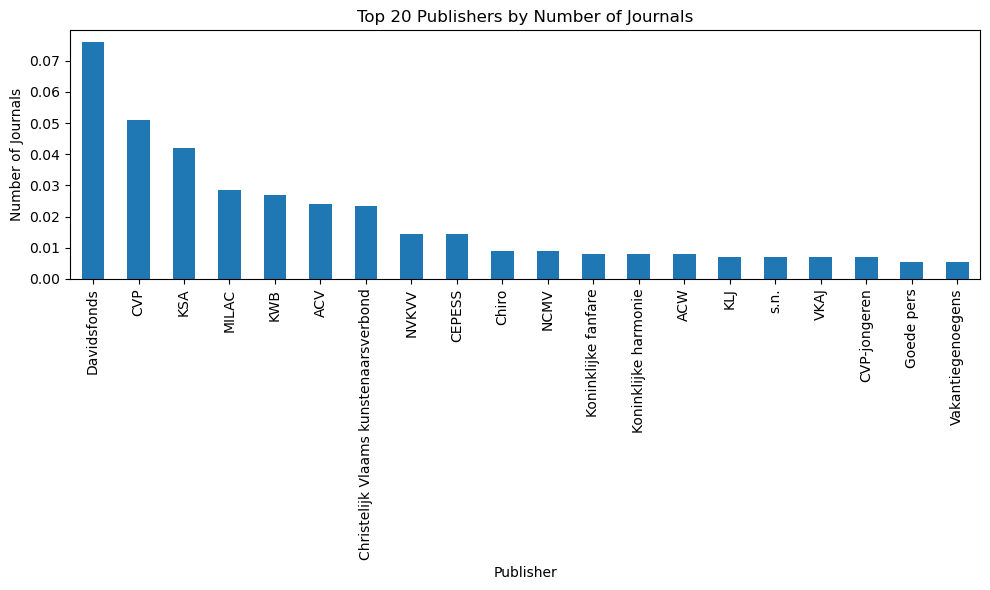

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each publisher
publisher_frequencies = data['Name of Publisher'].value_counts()
publisher_frequenciesNORM = data['Name of Publisher'].value_counts(normalize=True) #proportional counts

# To save frequencies to a new DataFrame (optional)
publisher_frequencies_df = pd.DataFrame(publisher_frequencies)
publisher_frequencies_df.columns = ['Frequency'] # Rename the frequency column if needed
#publisher_frequencies_df.to_csv('publisher_frequencies.csv')

# Display the frequencies or save them to a new DataFrame
print(publisher_frequencies)

# Count the number of unique publishers
unique_publishers_count = len(publisher_frequencies.index)
print(f"Number of unique publishers: {unique_publishers_count}")


publishers_with_one_journal = (publisher_frequencies == 1).sum() 
print(f"Number of publishers with only one journal: {publishers_with_one_journal}")

print(f'The percentage of publishers with only one journal: {(publishers_with_one_journal / unique_publishers_count) * 100} %')

#chart displaying top 20 publishers:
top_n_publishers = publisher_frequenciesNORM.head(20)

plt.figure(figsize=(10, 6))
top_n_publishers.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Number of Journals')
plt.title(f'Top {len(top_n_publishers)} Publishers by Number of Journals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




2. the frequency of publication

In [38]:
datafreq = pd.read_csv('DH-data-xlsx')
publishing_frequencies = datafreq['Publication Frequency'].value_counts()

plt.figure(figsize=(10, 6))
publishing_frequencies.plot(kind='bar')
plt.xlabel('Publishing Frequency')
plt.ylabel('Number of')
plt.title(f'Top {len(top_n_publishers)} Publishers by Number of Journals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'DH-data-xlsx'